In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

initial_housing_df=pd.read_csv("Bengaluru_House_Data.csv")

In [2]:
initial_housing_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
initial_housing_df.shape

(13320, 9)

In [120]:
initial_housing_df.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
#to know the count of different area types
initial_housing_df.groupby('area_type')['availability'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: availability, dtype: int64

In [5]:
modified_df=initial_housing_df.drop(['area_type','availability','society','balcony'],axis='columns')

In [6]:
modified_df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
modified_df.isnull().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [8]:
#so the columns location,size,bath have null values
modified_df.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
#location has 1 null value,size has 16 and bath has 73 null values
#now we have to filter null values
modified_df2=modified_df.dropna()

In [10]:
modified_df2.isnull().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [11]:
#so we have filtered or dropped null value rows from the data set..so finally we have the following no.of rows in our dataset
modified_df2.shape

(13246, 5)

In [12]:
#checking the size column whether they are in the same pattern
modified_df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
#as the size column ha =s the values in different pattern , we are using lambda function to split the integer 
#part from the column value and adding it into a new column
modified_df2['bedrooms']=modified_df2['size'].apply(lambda x: x.split(' ')[0])

/var/folders/93/klkd7xwj3_71bb4kd3wrvbcx4f_f9m/T/ipykernel_23019/2582744465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df2['bedrooms']=modified_df2['size'].apply(lambda x: x.split(' ')[0])


In [14]:
modified_df2.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
#now checking the total_sqft column
modified_df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#so some values are range values.for this we are going to convert the values into float
def is_float(x):
    try:
         float(x)
    except:
        return False
    return True

modified_df2[~modified_df2['total_sqft'].apply(is_float)].head(20)


,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
#there are some values in range and some values in other units like meter ,acres
#writing a function to convert the range into average of two numbers and skipping other unit values
#when a value other than integer or range value is encountered, it returns none
def convert_range_sqft(x):
    y=x.split('-')
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None
convert_range_sqft('1000-1285')

1142.5

In [20]:
convert_range_sqft('2166')

2166.0

In [21]:
convert_range_sqft('5.31Acres')

In [22]:
#copying modified_df2 into modified_df3
modified_df3=modified_df2.copy()

In [23]:
modified_df3['total_sqft']=modified_df3['total_sqft'].apply(convert_range_sqft)

In [24]:
modified_df3.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
modified_df3.loc[1086]

location      Narasapura
size           2 Bedroom
total_sqft           NaN
bath                 2.0
price               29.5
bedrooms               2
Name: 1086, dtype: object

In [28]:
#creating a new column to store price per sqft value
modified_df4=modified_df3.copy()
modified_df4['price_per_sqft']=round(modified_df4['price']*100000/modified_df4['total_sqft'],2)

In [29]:
modified_df4.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [30]:
len(modified_df4['location'].unique())

1304

In [31]:
#so there are 1304 unique locations
#so we have to do dimensionality reduction
#now we are going to remove extra spaces in the location name
modified_df4['location']=modified_df4['location'].apply(lambda x:x.strip())

In [32]:
location_stats=modified_df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
display(location_stats)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [33]:
#so here from the above results we can say that some locations have only one house and some have a max of 535 houses
#now we are going know how many locations have less than 10 houses
len(location_stats[location_stats<=10])

1052

In [34]:
#so there are 1052 locations which have less than 10 houses
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [35]:
len(modified_df4['location'].unique())

1293

In [36]:
modified_df4['location']=modified_df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [37]:
modified_df4.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [38]:
len(modified_df4['location'].unique())

242

### the next step is to find outliers 

In [39]:
#so now we have replaced the locations which has less than 10 houses into 'other'

#for this if we consider the bed room size >= 300 sft else remove that row
modified_df4.dtypes

#modified_df4[(modified_df4.bedrooms/modified_df4.total_sqft)<300].head()

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bedrooms           object
price_per_sqft    float64
dtype: object

In [40]:
#so the datatype for bedrooms column should be int.we need to change it.
covert_type = {'bedrooms':int}
modified_df4=modified_df4.astype(covert_type)

In [41]:
modified_df4.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bedrooms            int64
price_per_sqft    float64
dtype: object

In [42]:
#finding the outliers by calculating the size of bed rooms
modified_df4[(modified_df4.total_sqft/modified_df4.bedrooms)<300].head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00


In [43]:
modified_df4.shape

(13246, 7)

In [44]:
#now we have to create a new df and store the rows which has the bed room size > 300sqft
modified_df5=modified_df4[~((modified_df4.total_sqft/modified_df4.bedrooms)<300)]

In [45]:
modified_df5.shape

(12502, 7)

## finding the outliers in price

In [46]:
modified_df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [47]:
modified_df5.shape

(12502, 7)

In [48]:
#so there are outliers in the price
#it depends on the location.so we are going to write a function to remove outliers based on the standard deviation

def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    
modified_df6=remove_pps_outliers(modified_df5)

In [49]:
display(modified_df6)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.81
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.08
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.97
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.58
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.12


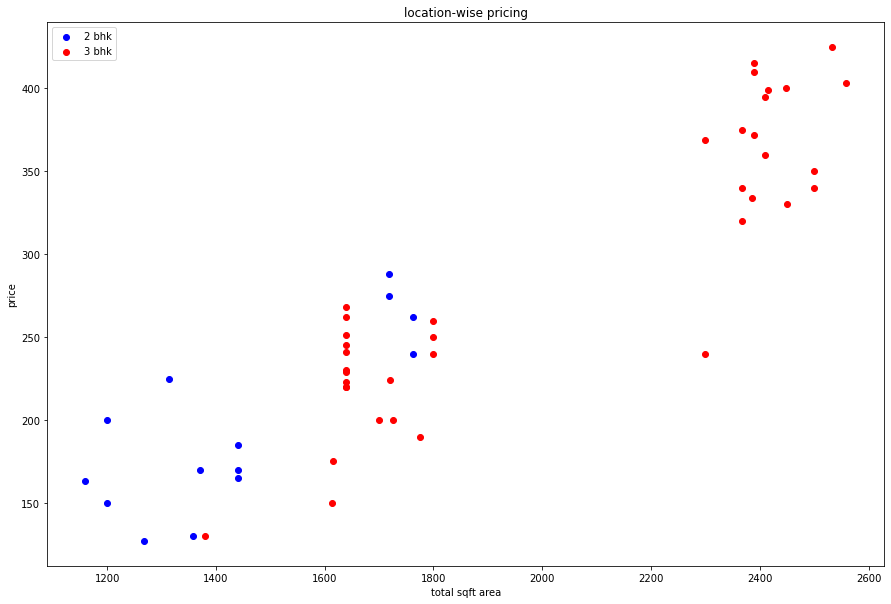

In [50]:
#drawing a scatter plot for 2 and 3 bedrooms flats location wise
import matplotlib as mpl
def plot_scatter_chart(df,location):
    bk2=df[(df.location==location) & (df.bedrooms==2)]
    bk3=df[(df.location==location)&(df.bedrooms==3)]
    mpl.rcParams['figure.figsize']=(15,10)
    plt.scatter(bk2.total_sqft,bk2.price,color='blue',label='2 bhk')
    plt.scatter(bk3.total_sqft,bk3.price,color='red',label='3 bhk')
    plt.xlabel('total sqft area')
    plt.ylabel('price')
    plt.title('location-wise pricing')
    plt.legend()
    
plot_scatter_chart(modified_df6,'Rajaji Nagar')

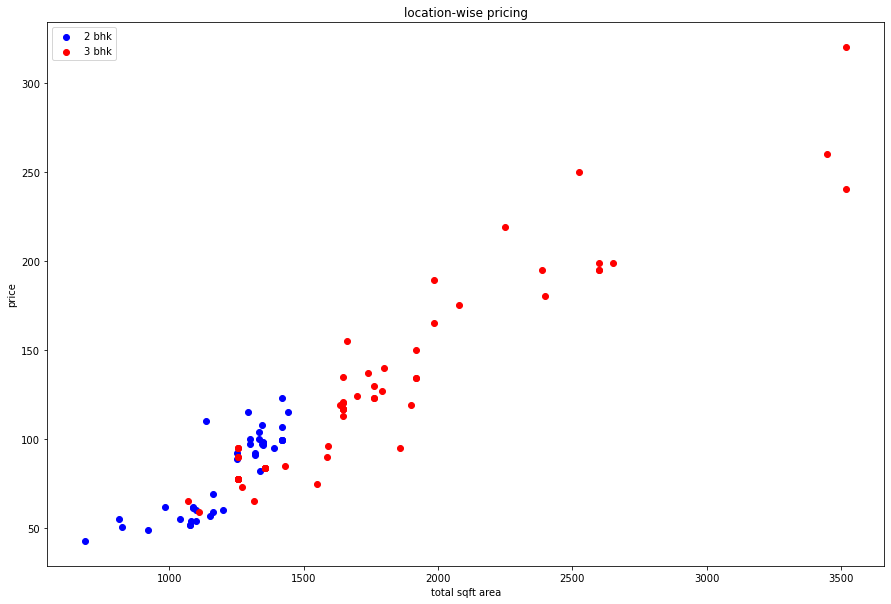

In [51]:
#if we closly observe the data points some 2bhk with same sqft are more expensive than 3bhk
#the same is observed at hebbal location
plot_scatter_chart(modified_df6,'Hebbal')

## removing outliers based on bedrooms

In [54]:
#in the above fig as 2bhk are expensive than 3bhk we have to remove the 3bhks which are lesser than 2bhk
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
modified_df7 = remove_bhk_outliers(modified_df6)
# df8 = df7.copy()
modified_df7.shape
    

(7329, 7)

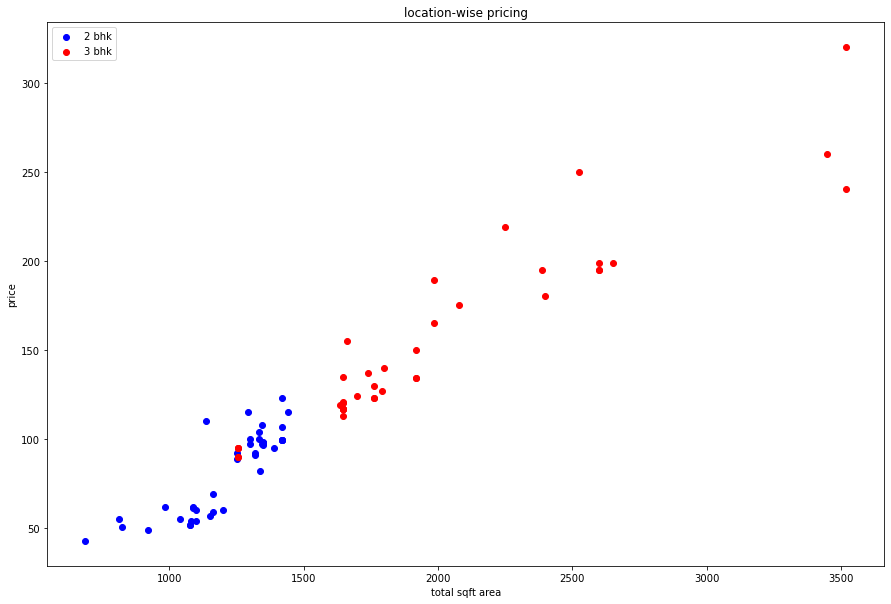

In [55]:
plot_scatter_chart(modified_df7,'Hebbal')

Text(0, 0.5, 'number of houses')

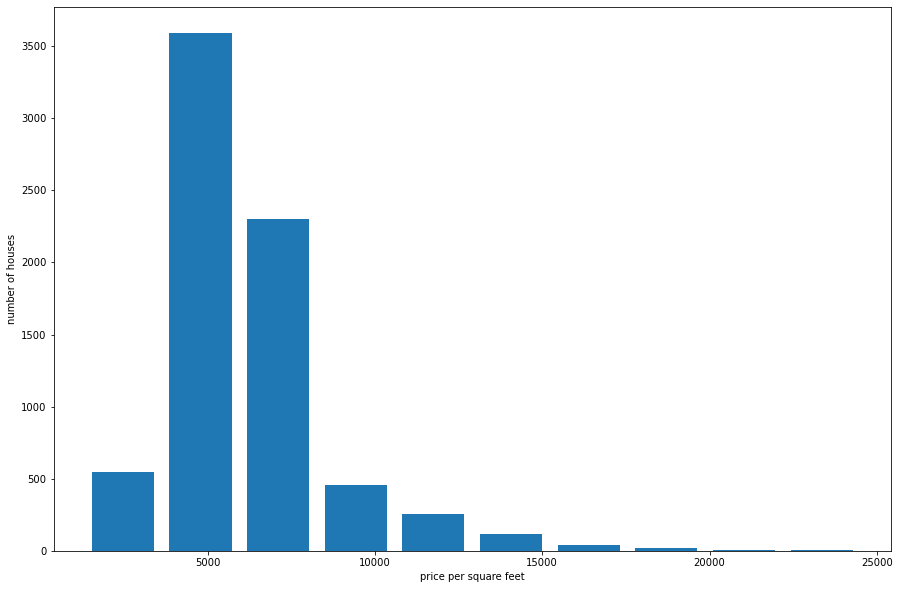

In [56]:
mpl.rcParams['figure.figsize']=(15,10)
plt.hist(modified_df7.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('number of houses')


In [57]:
#so majority of the houses have the price per sft as 5000
#now lets check the bathrooms.
modified_df7.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [58]:
modified_df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [59]:
modified_df7[modified_df7.bath>10]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.00
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.00
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.00
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.12


Text(0, 0.5, 'no.of houses')

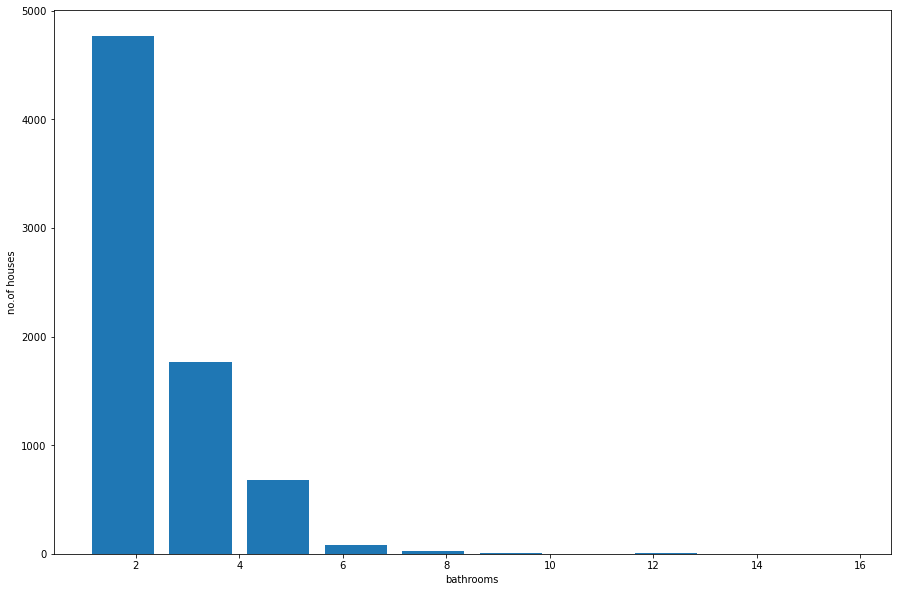

In [60]:
#so usually the houses which have 2 bedroom will have 2 bath rooms.
#lets draw a histogram
mpl.rcParams['figure.figsize']=(15,10)
plt.hist(modified_df7.bath,rwidth=0.8)
plt.xlabel('bathrooms')
plt.ylabel('no.of houses')


In [61]:
#so if our managers says that the no.of baths should not be more than the no.of bedrooms+2
#lets find the houses which are falling in the above criteria
modified_df7[modified_df7.bath>modified_df7.bedrooms+2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [62]:
#now the above houses are having bath>beds+2
#we have to remove them
modified_df8 = modified_df7[modified_df7.bath<modified_df7.bedrooms+2]
modified_df8.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [63]:
modified_df8.shape

(7251, 7)

In [64]:
#now we dropped all the outliers from each column
#now the 'size' 'price_per_sqft' columsns are not needed for our analysis
#as we already have bedrooms column which is derieved from size
modified_df8.drop(['size','price_per_sqft'],axis='columns')

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [66]:
#we have to convert categorical values into numerical values
#so we are using get_dummies to create numerical values
dummies=pd.get_dummies(modified_df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#in dummies df there is no location column
modified_df9=pd.concat([modified_df8,dummies.drop('other',axis='columns')],axis='columns')
modified_df9.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
modified_df10=modified_df9.drop(['location','size'],axis='columns')

In [69]:
modified_df10.head()

,total_sqft,bath,price,bedrooms,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.54,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.84,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
modified_df10=modified_df10.drop('price_per_sqft',axis='columns')

In [71]:
modified_df10.shape

(7251, 245)

In [103]:
#x is the independent variable which has all the columns other than price
x=modified_df10.drop('price',axis='columns')

In [104]:
x.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#y is the dependent variable
y=modified_df10.price

In [106]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [107]:
#to do prediction we have to split the data into two parts, train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [108]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8452277697874312

In [109]:
#cross validating by splitting the data multiple times
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2,random_state =0)
cross_val_score(LinearRegression(),x,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

#### the above result shows the score is above 80 in almost all the splits.so we can say that linear regression can be applied for prediction

In [110]:
x.columns

Index(['total_sqft', 'bath', 'bedrooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [111]:
#to get the index of a particular location we can write it as
np.where(x.columns == '2nd Phase Judicial Layout')[0][0]

5

In [114]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    xp = np.zeros(len(x.columns))
    xp[0] = sqft
    xp[1] = bath
    xp[2] = bhk
    if loc_index >= 0:
        xp[loc_index] = 1
    #print(xp)
    return lr_clf.predict([xp])[0]

In [115]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677179228

##### so for a house which is located in 1st phase jp nagar with 2 bed 2bath and 1000 sqft is 83.4 lakh rupees

In [118]:
predict_price('Indira Nagar',1000,2,3)

179.50527707582387

##### for an apartment in Indira Nagar which has 3 bed and 2 bathrooms with 1000 sqft the predicted price is 179.5 lakhs.
##### we can say that its a costly area to buy a house

In [121]:
coefficients = lr_clf.coef_
print(coefficients)

[ 7.94153739e-02  5.07902494e+00 -1.77287776e+00  1.20102684e+02
  1.60975131e+00 -5.31632191e+01  1.00744709e+02 -7.09814933e+01
 -3.92159542e+01 -1.90172851e+01 -1.86570903e+01 -4.78597086e+01
 -4.58072684e+01 -3.63103183e+01 -5.37188439e+01 -4.32014933e+01
 -2.83334456e+01 -3.09802727e+01 -3.41349983e+01 -4.35542164e+01
 -4.68557495e+01 -3.55443843e+01 -5.13413322e+01 -4.41161322e+01
 -3.39107391e+01 -3.50994582e+01 -1.93206330e+01  4.33396158e+00
 -4.16896109e+01 -5.24666080e+01 -2.97715337e+01 -1.63570371e+01
 -3.29128205e+01  8.46006640e+01 -3.45699543e+01 -6.21719706e+01
 -6.17763832e+01 -3.13725549e+01 -3.50075406e+01 -1.45173949e+01
 -3.25890006e+01  2.90158013e+01 -1.04900683e+00 -4.98796074e+01
 -4.60568702e+01 -5.61764461e+01 -3.36588705e+01  1.18623825e+02
 -4.57177739e+01 -3.17196120e+01 -2.38864848e+01 -4.14547240e-01
 -3.88800233e+01 -4.63934835e+01 -4.75920574e+01 -5.95786261e+01
  3.25208099e+00 -2.09267632e+01 -4.01275019e+01 -3.20205448e+01
  1.91028758e+01 -4.46079